We wanted to solve a similar problem for cubic equations, computing the number of real zeros of cubic equations with randomly generated coefficients. Cubic equations can have either 1, 2, or 3 real roots, depending again on the sign of the discriminant. Alternatively, you can also find the zeroes of the derivative, we'll call x1 and x2, and plug those back into the original function. If the f(x1) * f(x2) is negative, you know that the cubic must cross the x-axis at 3 points. Below are the three general shapes of a cubic. In 1, the derivative has complex solutions meaning the discriminant of the derivative is negative. In 2, the discriminant would be 0 and in 3, the discriminant is positive.

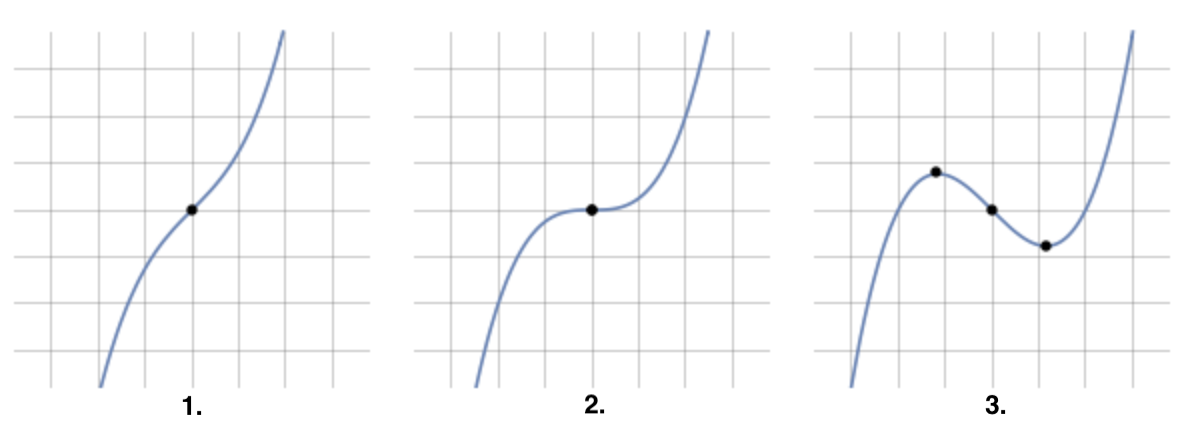

In [1]:
import numpy as np
import math
import random
ITERATIONS = 100000

In [2]:
# Random number generator that gives a number from a Gaussian distribution centered at 0 with a standard deviation of 1
def get_random():
    x = np.random.normal()
    return x

In [3]:
def func(a,b,c,d,x):
    return a*x**3 + b*x**2 + c*x + d

def get_cubic_percentages():
    thrz = 0
    twrz = 0
    orz = 0
    for i in range(ITERATIONS):
        a = get_random()
        b = get_random()
        c = get_random()
        d = get_random()
        a0 = 3*a
        b0 = 2*b
        unrooted = b0**2 - 4*a0*c
        if unrooted > 0:
            det = math.sqrt(unrooted)
            x1 = (-1*b0-det)/(2*a0)
            x2 = (-1*b0+det)/(2*a0)
            y1 = func(a,b,c,d,x1)
            y2 = func(a,b,c,d,x2)
            mult = y1*y2
            if mult < 0:
                thrz += 1
            elif mult == 0:
                twrz += 1
            elif mult > 0:
                orz += 1
        else:
            orz += 1
    thrz /= ITERATIONS
    twrz /= ITERATIONS
    orz /= ITERATIONS
    return thrz, twrz, orz


In [4]:
g = get_cubic_percentages()
thrz = round(g[0]*100,4)
twrz = round(g[1]*100,4)
orz = round(g[2]*100,4)
print("The average relative percentages of real roots for a cubic equation with randomly generated coefficients are:")
print(f"Average three real: {thrz}%")
print(f"Average two real: {twrz}%")
print(f"Average one real: {orz}%")


The average relative percentages of real roots for a cubic equation with randomly generated coefficients are:
Average three real: 24.55%
Average two real: 0.0%
Average one real: 75.45%


In [5]:
def get_cubic_percentages_with_discriminant():
    orz = 0
    twrz = 0
    thrz = 0
    for _ in range(ITERATIONS):
      a = get_random()
      b = get_random()
      c = get_random()
      d = get_random()
      disc = b**2*c**2 - 4*a*c**3 - 4*b**3*d - 27*a**2*d**2 + 18*a*b*c*d
      if disc == 0:
        twrz += 1
      elif disc>0:
        thrz += 1
      elif disc<0:
        orz += 1
    orz/=ITERATIONS
    twrz/=ITERATIONS
    thrz/=ITERATIONS
    return thrz, twrz, orz


In [6]:
g = get_cubic_percentages_with_discriminant()
thrz = round(g[0]*100,4)
twrz = round(g[1]*100,4)
orz = round(g[2]*100,4)
print("The average relative percentages of real roots for a cubic equation with randomly generated coefficients are:")
print(f"Average three real: {thrz}%")
print(f"Average two real: {twrz}%")
print(f"Average one real: {orz}%")

The average relative percentages of real roots for a cubic equation with randomly generated coefficients are:
Average three real: 24.678%
Average two real: 0.0%
Average one real: 75.322%
